# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [ ]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
# Extract all rows of data
tr = soup.find_all('tr', class_='data-row') # finds all table rows

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [ ]:
# Create an empty list
mars_list = []

# Loop through the scraped data to create a list of rows
for row in tr: # for each row
    cols = row.find_all('td') # find the data
    cols = [t.text.strip() for t in cols] # format and save to a list
    mars_list.append([obj for obj in cols if obj]) # if there's data, add it to the output

In [65]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(mars_list, columns=['id','terrestrial_date','sol','ls',
                                      'month','min_temp','pressure'])

In [66]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [67]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [68]:
# Change data types for data analysis
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = df['terrestrial_date'].astype('datetime64[s]')
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [69]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          int64
terrestrial_date    datetime64[s]
sol                         int64
ls                          int64
month                       int64
min_temp                  float64
pressure                  float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [ ]:
# 1. How many months are there on Mars?
months = len(df['month'].unique()) # counts number of months
months


12

In [ ]:
# 2. How many sols (Martian days) worth of data are there?
sols = len(df['sol'].unique()) # counts observations of martian days
sols

1867

In [ ]:
# 3. What is the average minimum temperature by month?
group_month = df.groupby('month').mean() # group by month and find averages of the whole table
min_temps = group_month['min_temp'] # just select min temp
min_temps

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<Axes: title={'center': 'Avg. Martian Min. Temps by Month'}, xlabel='Month', ylabel='Temperature'>

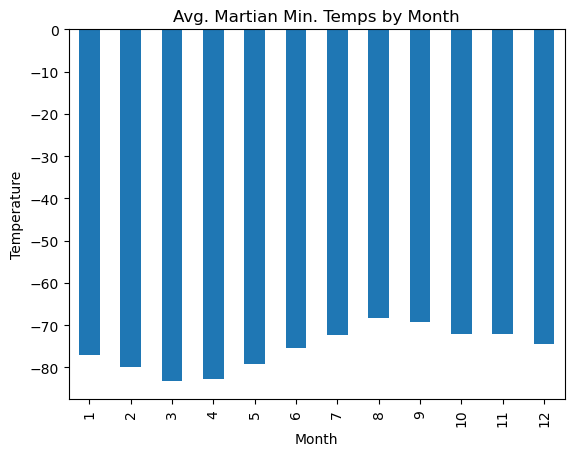

In [ ]:
# Plot the average minimum temperature by month
min_temps.plot(kind='bar', title='Avg. Martian Min. Temps by Month', 
               ylabel='Temperature', xlabel='Month')

<Axes: title={'center': 'Avg. Martian Min. Temps by Month (Ascending)'}, xlabel='Month', ylabel='Temperature'>

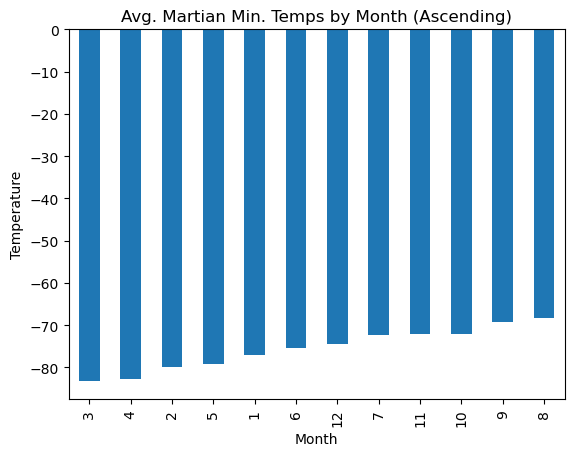

In [90]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
min_temps_sorted = min_temps.sort_values()
min_temps_sorted.plot(kind='bar', title='Avg. Martian Min. Temps by Month (Ascending)',
                      ylabel='Temperature', xlabel='Month')

In [ ]:
# 4. What is the average pressure by month?
avg_pressure = group_month['pressure'] # this time, pressure is selected
avg_pressure 

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<Axes: title={'center': 'Avg. Martian Pressure by Month'}, xlabel='Month', ylabel='Pressure'>

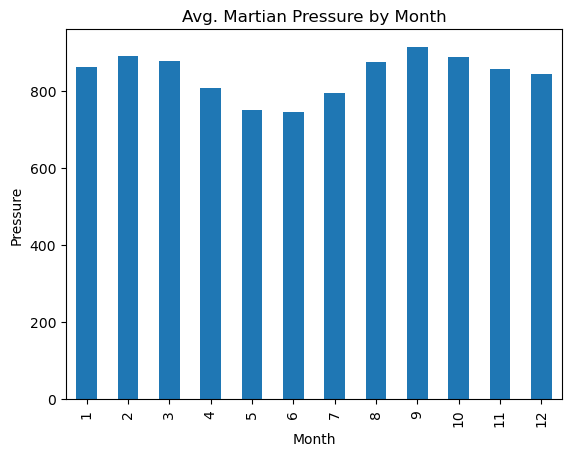

In [92]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', title='Avg. Martian Pressure by Month', 
               ylabel='Pressure', xlabel='Month')

<Axes: title={'center': 'Avg. Martian Pressure by Month (Ascending)'}, xlabel='Month', ylabel='Pressure'>

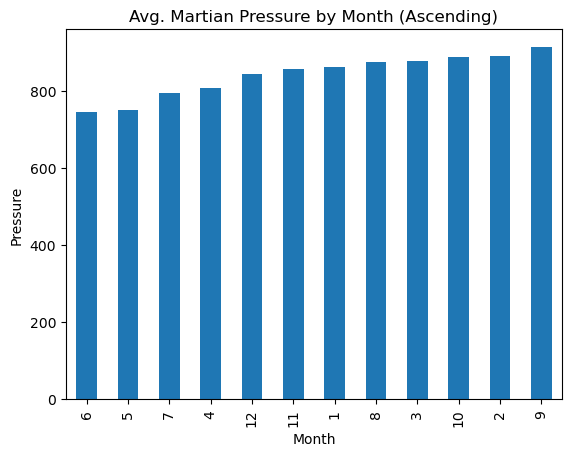

In [99]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
pressure_sorted = avg_pressure.sort_values()
pressure_sorted.plot(kind='bar', title='Avg. Martian Pressure by Month (Ascending)', 
               ylabel='Pressure', xlabel='Month')

<Axes: title={'center': 'Martian Min. Temp for all Observations'}, xlabel='Terrestrial Day', ylabel='Temperature'>

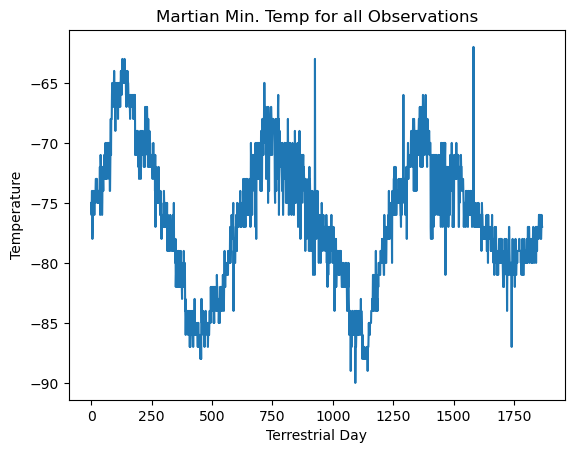

In [96]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
min_temps_total = df['min_temp']
min_temps_total.plot(kind='line', title='Martian Min. Temp for all Observations',
                     ylabel='Temperature', xlabel='Terrestrial Day')

#### Minimum Temperature

All the months show an average minimum temperature within the same range (between -85 and -70). The 3rd month has the lowest average minimum temperature, while the 8th month has the highest average minimum temperature. Along with this, months 1-6 are on average colder than months 7-12. Extrapolation from this data, assumptions can be made that Mars' Perihelion is likely in the 8th month, and its Aphelion is likely in the 3rd. 

#### Atmospheric Pressure

Atmospheric pressure is highest in the 9th month, and lowest in the 6th. Pressure does not follow an annual trend, like temperature does. There seems to be no consistent theme amongst pressure observations. The only pattern that emerges is that pressure goes up at the beggining of the year, falls down to a low in the 6th month, jumps up to a high in the 9th, and then falls back down again before repeating the process. 

#### Year Length

Based on the graph, it appears that there are roughly 660 Earth days in a Martian year. Further research shows this estimate to be accurate within 30 days, since the actual number for Mars' rotational period is 687 Earth days. [Source: Nasa](https://science.nasa.gov/mars/facts/#:~:text=A%20year%20on%20Mars%20lasts,its%20orbit%20around%20the%20Sun.)

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [97]:
# Write the data to a CSV
df.to_csv('marsdata.csv')

In [98]:
browser.quit()